<a href="https://colab.research.google.com/github/Chutki319239/Tree-Species-Classification/blob/main/Tree_Species_Classification_%5BEDUNET_SHELL_INTERNSHIP%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l "/content/drive/MyDrive"


total 564820
-rw------- 1 root root    447793 Jul 31  2024 '23MCB0025 (1).pdf'
-rw------- 1 root root    451093 Jul 31  2024 '23MCB0025 (1).pdf.docx'
-rw------- 1 root root    316058 Jul 31  2024 '23MCB0025_COA_TH (1).pdf'
-rw------- 1 root root    316058 Jul 31  2024  23MCB0025_COA_TH.pdf
-rw------- 1 root root    332219 Jul 31  2024 '23MCB0025_LA5 (1).pdf'
-rw------- 1 root root    332219 Jul 31  2024  23MCB0025_LA5.pdf
-rw------- 1 root root    447793 Jul 31  2024  23MCB0025.pdf
-rw------- 1 root root    451093 Jul 31  2024  23MCB0025.pdf.docx
-rw------- 1 root root    387428 Jul 31  2024 '23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET (1).docx'
-rw------- 1 root root    402601 Jul 31  2024 '23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET (1).pdf'
-rw------- 1 root root    387428 Jul 31  2024  23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET.docx
-rw------- 1 root root    402601 Jul 31  2024  23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET.pdf
-rw------- 1 root root    387381 Jul 31  2024 '23MCB0025_VUSALA_SRI_SAI

In [ ]:
!mv "/content/drive/MyDrive/archive (1)" "/content/drive/MyDrive/archive1"


mv: cannot stat '/content/drive/MyDrive/archive (1)': No such file or directory


In [ ]:
!ls -l "/content/drive/MyDrive"


total 564820
-rw------- 1 root root    447793 Jul 31  2024 '23MCB0025 (1).pdf'
-rw------- 1 root root    451093 Jul 31  2024 '23MCB0025 (1).pdf.docx'
-rw------- 1 root root    316058 Jul 31  2024 '23MCB0025_COA_TH (1).pdf'
-rw------- 1 root root    316058 Jul 31  2024  23MCB0025_COA_TH.pdf
-rw------- 1 root root    332219 Jul 31  2024 '23MCB0025_LA5 (1).pdf'
-rw------- 1 root root    332219 Jul 31  2024  23MCB0025_LA5.pdf
-rw------- 1 root root    447793 Jul 31  2024  23MCB0025.pdf
-rw------- 1 root root    451093 Jul 31  2024  23MCB0025.pdf.docx
-rw------- 1 root root    387428 Jul 31  2024 '23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET (1).docx'
-rw------- 1 root root    402601 Jul 31  2024 '23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET (1).pdf'
-rw------- 1 root root    387428 Jul 31  2024  23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET.docx
-rw------- 1 root root    402601 Jul 31  2024  23MCB0025_VUSALA_SRI_SAI_PRAVALLIKA_SET.pdf
-rw------- 1 root root    387381 Jul 31  2024 '23MCB0025_VUSALA_SRI_SAI

In [ ]:
import os

data_path = "/content/drive/MyDrive/archive1"

for root, dirs, files in os.walk(data_path):
    print("📁", root)
    print("📂", dirs)
    print("📄", files[:5])
    print("-" * 40)


📁 /content/drive/MyDrive/archive1
📂 ['Tree_Species_Dataset']
📄 []
----------------------------------------
📁 /content/drive/MyDrive/archive1/Tree_Species_Dataset
📂 ['bili', 'garmalo', 'coconut', 'babul', 'banyan', 'bamboo', 'champa', 'asopalav', 'cactus', 'amla', '.git', 'vad', 'other', 'sitafal', 'saptaparni', 'simlo', 'pipal', 'pilikaren', 'shirish', 'sonmahor', 'sugarcane', 'gunda', 'nilgiri', 'neem', 'jamun', 'khajur', 'kesudo', 'mango', 'gulmohor', 'kanchan', 'motichanoti']
📄 []
----------------------------------------
📁 /content/drive/MyDrive/archive1/Tree_Species_Dataset/bili
📂 []
📄 []
----------------------------------------
📁 /content/drive/MyDrive/archive1/Tree_Species_Dataset/garmalo
📂 []
📄 ['image29.jpg', 'image28.jpg']
----------------------------------------
📁 /content/drive/MyDrive/archive1/Tree_Species_Dataset/coconut
📂 []
📄 []
----------------------------------------
📁 /content/drive/MyDrive/archive1/Tree_Species_Dataset/babul
📂 []
📄 ['3.jpeg']
------------------------

In [ ]:
!pip install split-folders
import splitfolders

# Set source and destination paths
source_dir = "/content/drive/MyDrive/archive1/Tree_Species_Dataset"
output_dir = "/content/tree_dataset_split"

# Split into train:val:test = 70:20:10
splitfolders.ratio(source_dir, output=output_dir, seed=42, ratio=(.7, .2, .1))

Copying files: 1105 files [05:22,  3.42 files/s]


In [ ]:
train_dir = "/content/tree_dataset_split/train"
val_dir = "/content/tree_dataset_split/val"
test_dir = "/content/tree_dataset_split/test"


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 150
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 772 images belonging to 31 classes.
Found 219 images belonging to 31 classes.
Found 114 images belonging to 31 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.0850 - loss: 4.2562 - val_accuracy: 0.1461 - val_loss: 2.9910
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.1362 - loss: 3.0113 - val_accuracy: 0.2420 - val_loss: 2.8511
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.1876 - loss: 2.8248 - val_accuracy: 0.2557 - val_loss: 2.5613
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.2118 - loss: 2.7069 - val_accuracy: 0.3014 - val_loss: 2.4860
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3034 - loss: 2.3620 - val_accuracy: 0.2922 - val_loss: 2.4064
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.4478 - loss: 1.9803 - val_accuracy: 0.3927 - val_loss: 2.2053
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.6152 - loss: 1.4371 - val_accuracy: 0.3881 - val_loss: 2.1867
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.6615 - loss: 1.0806 - val_accuracy: 0.4201 - val_loss:

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step - accuracy: 0.3592 - loss: 2.6904
✅ Test Accuracy: 37.72%


In [ ]:
model.save("/content/tree_species_model.keras")  # Recommended format


In [ ]:
from google.colab import files
files.download("/content/tree_species_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls /content


drive  sample_data  tree_dataset_split


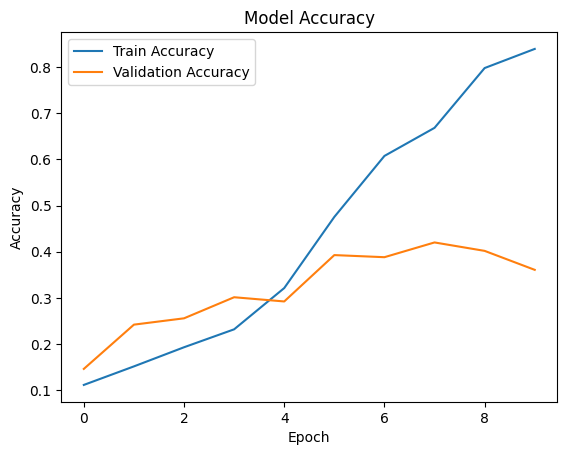

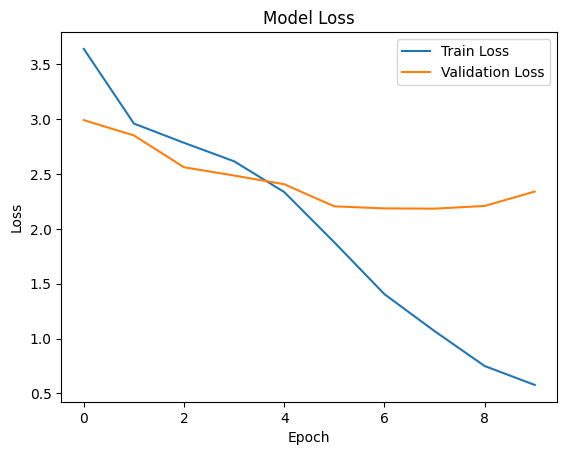

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Found 619 images belonging to 31 classes.
Found 153 images belonging to 31 classes.
Found 114 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 93s 4s/step - accuracy: 0.0961 - loss: 3.2490 - val_accuracy: 0.3137 - val_loss: 2.5854
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.3285 - loss: 2.4287 - val_accuracy: 0.4379 - val_loss: 2.2311
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.5009 - loss: 1.9876 - val_accuracy: 0.4771 - val_loss: 1.9765
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.5652 - loss: 1.6777 - val_accuracy: 0.5163 - val_loss: 1.8691
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.6200 - loss: 1.5329 - val_accuracy: 0.5490 - val_loss: 1.6947
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.6697 - loss: 1.4021 - val_accuracy: 0.6013 - val_loss: 1.6603
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.7051 - loss: 1.2583 - val_accuracy: 0.5817 - val_loss: 1.5577
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.7125 - loss: 1.1808 - val_accuracy: 0.6275 - val_loss:

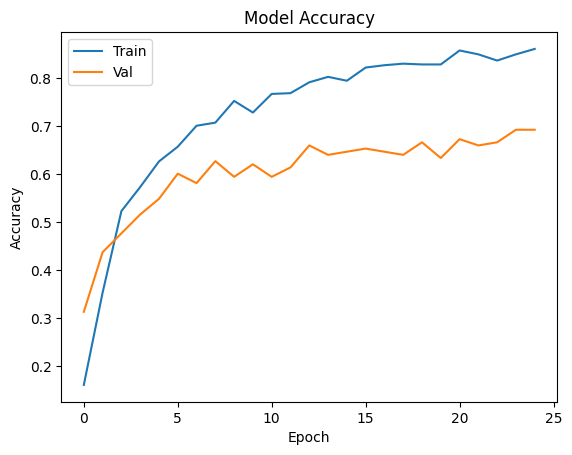

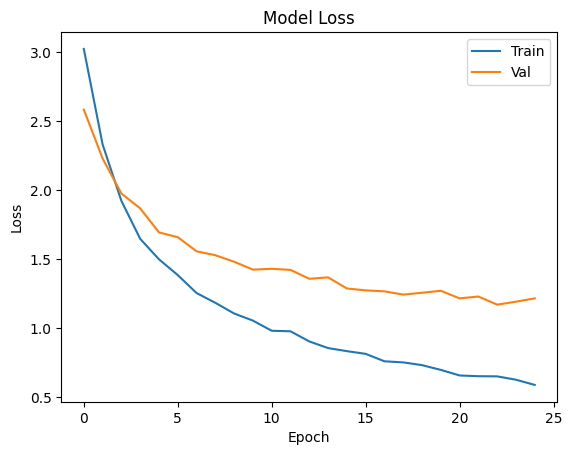

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define paths
base_path = "/content/tree_dataset_split"
train_dir = os.path.join(base_path, "train")
test_dir = os.path.join(base_path, "test")

# Image parameters
img_height, img_width = 224, 224
batch_size = 32

# ImageDataGenerators with augmentation and validation split
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    validation_split=0.2  # Use 20% of training data for validation
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training', # Specify training subset
    shuffle=True
)

val_gen = train_datagen.flow_from_directory( # Use the same datagen for validation
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation', # Specify validation subset
    shuffle=False # No need to shuffle validation data
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())

# Build the model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Fine-tune later if needed

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x) # Added Dropout
output = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) # Changed optimizer and learning rate

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("tree_species_model.keras", monitor='val_accuracy', save_best_only=True)

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=25,
    callbacks=[early_stop, checkpoint]
)

# Evaluate
loss, acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {acc * 100:.2f}%")

# Plot accuracy/loss
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()